In [2]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]


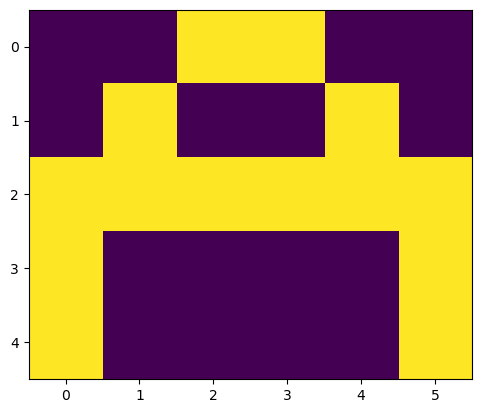

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()


In [6]:
# converting data and labels into numpy array

"""
Convert the matrix of 0 and 1 into one hot vector 
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""

x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), 
								np.array(c).reshape(1, 30)]


# Labels are also converted into NumPy array
y = np.array(y)


print(x, "\n\n", y)


[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [7]:
# activation function

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# out put of layer 2 
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# output of layer 2 
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 




In [8]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)


[[ 1.08040886e+00 -8.78681783e-01  2.02537243e+00  8.59909856e-01
  -7.67337966e-01]
 [-2.34663866e-03 -1.81403944e+00 -5.40699211e-01 -4.27969335e-01
   5.02380313e-01]
 [-7.81311800e-01 -7.99752331e-01 -1.81114198e+00  3.51761687e-02
  -1.56818075e-01]
 [ 6.38077268e-01  6.48732233e-01  3.43412241e-01 -9.34396586e-01
  -7.51103040e-01]
 [-8.97197242e-01 -4.82564196e-01  1.74120052e+00 -7.43598545e-01
   1.47619766e-01]
 [ 6.29548808e-01 -1.36613460e+00  9.22366265e-01 -1.44269819e+00
   7.87887334e-01]
 [-4.63354376e-01 -1.89978615e+00 -1.51410826e+00 -2.59924521e-01
   2.17304740e-01]
 [ 8.48285857e-01 -2.40282993e+00 -3.90379233e-01 -1.00434155e+00
   1.72054647e+00]
 [-1.32618701e+00  7.36604462e-01 -1.26785760e+00 -1.28351101e+00
  -6.39283712e-01]
 [-1.08016653e+00 -1.82520814e+00  4.51956553e-01  7.47209254e-01
   8.75828080e-01]
 [ 1.73640118e-01  1.06907199e+00 -5.08769730e-01  1.20086740e-01
   4.25343533e-01]
 [ 1.36743649e+00 -1.51698492e+00 -1.47860885e+00 -9.43243661e-01

In [9]:
"""The arguments of train function are data set list x, 
correct labels y, weights w1, w2, learning rate = 0.1, 
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of 
trained weights w1, w2"""

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 77.24992456845814
epochs: 2 ======== acc: 78.17033942301144
epochs: 3 ======== acc: 79.01294709091285
epochs: 4 ======== acc: 79.78127459200267
epochs: 5 ======== acc: 80.48280578026198
epochs: 6 ======== acc: 81.12521597554856
epochs: 7 ======== acc: 81.71518313111149
epochs: 8 ======== acc: 82.25839726560751
epochs: 9 ======== acc: 82.75983373103648
epochs: 10 ======== acc: 83.22397281862132
epochs: 11 ======== acc: 83.65492302577412
epochs: 12 ======== acc: 84.05647663776384
epochs: 13 ======== acc: 84.432128555381
epochs: 14 ======== acc: 84.78507790512515
epochs: 15 ======== acc: 85.11822253397327
epochs: 16 ======== acc: 85.43415126833868
epochs: 17 ======== acc: 85.73513674480144
epochs: 18 ======== acc: 86.02313128327079
epochs: 19 ======== acc: 86.29976853236944
epochs: 20 ======== acc: 86.56637365816032
epochs: 21 ======== acc: 86.82398418230865
epochs: 22 ======== acc: 87.07338208568251
epochs: 23 ======== acc: 87.31513575242079
epochs: 24 ======== ac

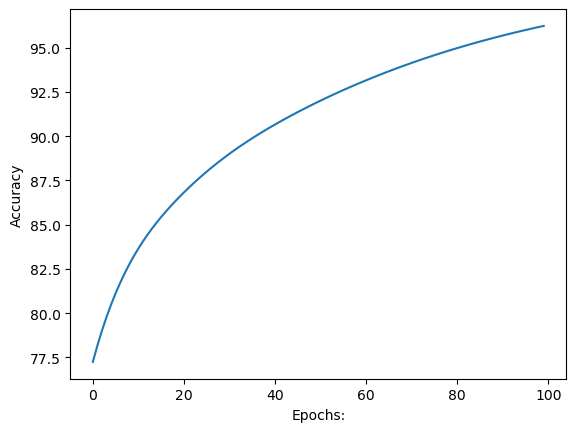

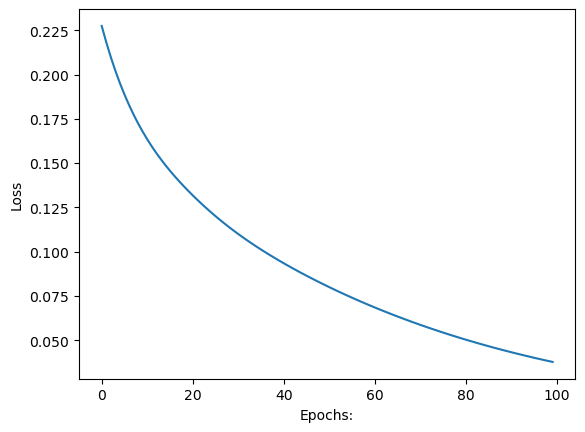

In [10]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()


In [11]:
# the trained weights are
print(w1, "\n", w2)


[[ 1.08040886 -0.87868178  2.02537243  0.85990986 -0.76733797]
 [ 0.16276076 -1.95337922 -0.54759384 -0.55973736  0.46510107]
 [-0.91722997 -0.70324724 -1.64603122  0.20748718 -0.1798712 ]
 [ 0.5021591   0.74523732  0.508523   -0.76208558 -0.77415617]
 [-0.73208984 -0.62190398  1.73430589 -0.87536657  0.11034052]
 [ 0.62954881 -1.3661346   0.92236626 -1.44269819  0.78788733]
 [-0.46335438 -1.89978615 -1.51410826 -0.25992452  0.21730474]
 [ 0.71236769 -2.30632484 -0.22526847 -0.83203054  1.69749334]
 [-1.32618701  0.73660446 -1.2678576  -1.28351101 -0.63928371]
 [-1.08016653 -1.82520814  0.45195655  0.74720925  0.87582808]
 [ 0.03340617  1.16523496 -0.33736701  0.42118852 -0.09251415]
 [ 1.36743649 -1.51698492 -1.47860885 -0.94324366  0.20834973]
 [ 0.70914082  1.52105365  0.65718917  1.40289751  0.71191846]
 [ 0.17339322 -0.66186816 -0.53288075  2.54202669  1.82807928]
 [-0.92550361 -0.40458096 -0.02182383 -1.06437883 -2.02914436]
 [ 0.00795046 -0.63616919 -3.40698581 -0.70816073 -0.95

Image is of letter B.


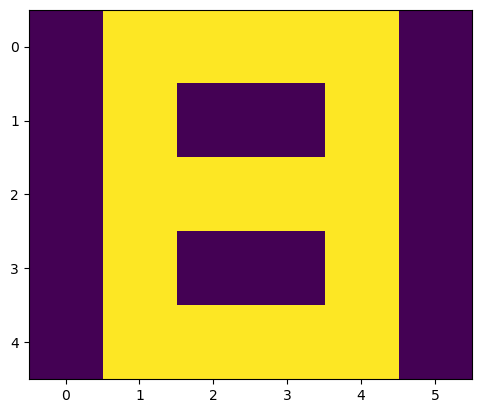

In [12]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)
